# Principal Component Analysis (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# # Creates a random number generator with a fixed seed of 1
# rng = np.random.RandomState(1)

# # Random Matrxi Multiplication for Data Geenration
# # rng.rand(2, 2): Generates a 2 x 2 matrix of random numbers b/w 0 and 1
# # rng.randn(2, 200): Generated a 2 x 200 matrix of random numbers drawn form a standard normal distribution(mean 0, sd 1)
# # np.dot(...): Performs a dot product. Result will be 2 x 200 matrix. Taking the transpose .T changes it to a 200 x 2 matrix, with each row representing a point in a 2D space
# X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T

# # X[:,0]: All x-coordiantes of the points
# # X[:, 1]: All y-coordinates
# plt.scatter(X[:, 0], X[:, 1])

# # Set the plot to have equal scaling on both axes
# plt.axis('equal')

# print(X.shape)

In [16]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Dataset
data = load_iris()

# Select the first two features for 2D visualizatio
X = data.data[:, :2]

In [18]:
# Stnadarize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
def PCA(X, n_components=1):
    # Step 1: Center the data
    # First it calcualtes the mean of X
    mean = np.mean(X, axis=0)

    # Then, it centers the data by subtracting the mean from each data points
    # This is essential in PCA since it ensures that the PC represents the directions of max variance, not influenced by the absolute values of the features
    X = (X - mean)

    # Step 2: Find covariance
    # We can direct do X.T @ X right away since we already center the data
    # X.T @ X performs matrix multiplication 
    cov = (X.T @ X) / (X.shape[0] - 1)
    print ("Covariance Matrix: ", cov)

    # Step 3: Find the eigenvalues using np.linalg.eig by inputting the covariance matrix
    # np.linalg.eigh is used to compute the eigen values and eigen vectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # Eigenvlaues represent the variance captures by each principak component 
    print("Eigenvalue shape: ", eigenvalues.shape) 

    # Eigen vectors represent the direction in the feature space
    print("Eigenvectors shape: ", eigenvectors.shape)


    # n'th principal components will be the first n'th eigenvectors with highes eigen values
    # Sort them from biggest to smallest
    ix = np.argsort(eigenvalues)[::-1]

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features")
    else:
        # [:, ix] sorts the columns of eigenvectors to match the sorted order of the eigenvalues. 
        # This is because each eigenvector corresponds to a specific eigenvalue, and we want to select the eigenvectors with the highest eigenvalues
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]

        # n_components is a param indicating the no. of principal componencts to keep
        # [:, n_components] selects only the top n_components eigenvector
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:, :n_components]

    # variance gained after n' component
    # This caluclates the cumulative variance explained by the selected components,
    # helping to understancd the proportion of variance captured by each additional component
    variance_exp_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

    # Projection of new vectors
    # Eigenvectors must be arranges inn columns
    projected_X = X @ eigenvectors

    print("Eigenvalues: ", eigenvalues)
    print("eigenvectors (column-wise): ", eigenvectors)

    return eigenvalues, eigenvectors, mean, projected_X




In [20]:
eigenvalues, eigenvectors, mean, projected_X = PCA(X, n_components=2)

Covariance Matrix:  [[ 1.00671141 -0.11835884]
 [-0.11835884  1.00671141]]
Eigenvalue shape:  (2,)
Eigenvectors shape:  (2, 2)
Eigenvalues:  [1.12507025 0.88835257]
eigenvectors (column-wise):  [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


Text(0.5, 1.0, 'PCA with orignal data')

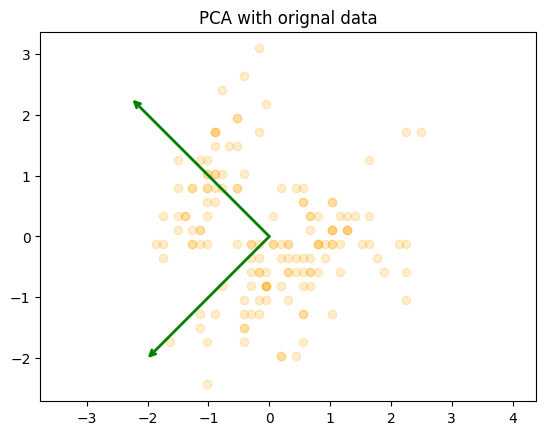

In [21]:
# Plotting
def draw_vector(v0, v1, ax=None):

    # sets ax to the current axes if no axes ar eprovided
    ax = ax or plt.gca()

    arrowprops = dict(arrowstyle='->',
                      linewidth=2,

                    #   Removes any space b/w the arrow head/tail and the specified start and end points
                      shrinkA=0,
                      shrinkB=0,
                      color='green')
    
    # Draws the arrow on the plot from v0 to v1 using the specified properties
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color='orange')

# Transpose so each row is eigenvector
# The loop iterates over each principal component and draws a scaled vector representing that component
# zip pairs each eignevalue with its corresponding eigenvector
for length, vector in zip(eigenvalues, eigenvectors.T):

    # Scales the eigenvector by the square root of its eigenvalue and futher by 3 for better visibility in the plot
    v = vector * 3 * np.sqrt(length)

    # draws the vector from the mean of the data to the end point of the vector(mean+v)
    # This shows the direction and magnitude of each principal component originating from the center of the data
    draw_vector(mean, mean+v)

plt.axis('equal')
plt.title('PCA with orignal data')

**Data Points:** The scatter plot (in orange) shows the original dataset, with each point representing an ibsrvation in 2-d space based on the selected features. The transparency (alpha = 0.2) makes overlapping points easier to notice

**Principal Components:** The green arrows represent components of the data:
- The **longer green arrow** points in the direction of the first principal component, which is the direction of maimum variance in the data. This indicates the direction aling whchhi the data is most spread out.

- The **second green arrow** shows the second principal component, which captures the second-largest variance in the data after the first component

**Mean-centerd:** Both arrows originate from the mean of the data, which is close to the center of the data points. This confirms the data has been centered before applying PCA.

**Variance Direction and Speed:**
- The first principal component (longer arrow) points toward the direction of max variance, which means the data varies most along this direction
- The shorter arrow shows the secondary direction of variation. togetherm these rwo vvectors represent the maine structure or pattern in the data 
 